# Exploratory Data Analysis (EDA)

Nesse jupyter notebook se encontram os passos da análise exploratória dos dados, assim como conclusões intermediárias que foram encontradas.

## Importando os arquivos e analisando os dados

In [1]:
!pip install seaborn

In [2]:
import pandas as pd

In [3]:
catalog.list()

['training_dataset', 'test_dataset', 'parameters']

In [4]:
df = catalog.load('training_dataset')

[02/13/23 14:30:02] INFO     Loading data from 'training_dataset' (CSVDataSet)...               data_catalog.py:343

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Tambem foi disponibilizado um dicionário:
    
Variável|Definição|Key
--------|----------|---
survival|Indica se o passageiro sobreviveu|0 = Não, 1 = Sim
pclass|Classe do passageiro|1 = Primeira, 2 = Segunda, 3 = Terceira
sex|Genero|
Age|Idade em anos|
sibsp|número de parentes/cônjuges a bordo do Titanic|
parch|numero de pais/filhos a bordo do Titanic|
ticket|Número do ticket|
fare|Valor pago pelo passageiro|
cabin|Número da cabine|
embarked|Porto de embarque|C = Cherbourg, Q = Queenstown, S = Southampton  

Após a aplicação dos métodos `info()` e `head()`, foram feitas algumas conclusões:

1 - As variáveis `Age`, `Cabin` e `Embarked` possuem informações nulas. Essa colunas deverão ser analizadas mais profundamente para entender o motivo.

2 - A variável `PassengerId` contém informações únicas para todas as linhas e não será útil em análises, por isso ela será removida do DataFrame. A *feature* Ticket também parece conter informações únicas e será analisada mais a fundo.

3 - As colunas `SibSp` e `Parch` contém informações sobre a quantidade de familiares. Análises posteriores serão efetuadas para a possibilidade de união das duas colunas.

4 - A variável `Name` possui, além do nome, informações a respeito de títulos de cada passageiro. Ela pode ser analisada mais a fundo.

5 - Há variáveis numéricas discretas e variáveis categóricas. As variáveis categóricas deverão ser tratadas durante a etapa de *feature engeneering*.

## Aprofundando

### Removendo colunas

Primeiro vamos remover a coluna `PassengerId`, que não será aproveitada:

In [7]:
df = df.drop(columns = 'PassengerId')

Podemos também analisar a coluna `Ticket`:

In [8]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

A coluna apresenta passageiros com o mesmo cartão, mas apresenta 681 valores únicos. Por isso ela também será removida

In [9]:
df = df.drop(columns = 'Ticket')

Outra coluna que pode ser analisada para remoção é a coluna `Cabin`. Ela contém valores nulos.

In [10]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

Por apresentar um grande número de valores nulos, essa coluna será removida.

In [11]:
df = df.drop(columns = 'Cabin')

In [12]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Colunas Age e Embarked

Primeiramente vamos olhar para a coluna `Embarked`, que sinaliza o porto de embarque de cada passageiro.

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Na análise com o método `info()`, foram descobertos valores nulos. Vamos pegar apenas esses registros e verificar:

In [14]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


Podemo verificar como é a distribuição de sobreviventes entre portos, para saber se há a necessidade de manter essa coluna.

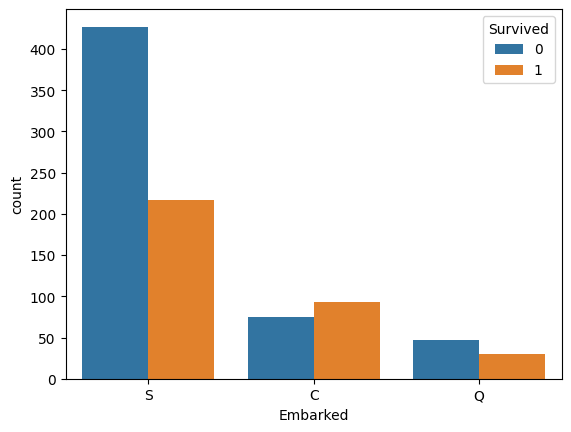

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data = df, x = 'Embarked', hue = 'Survived')

Como a coluna apresenta uma distribuição diferente para cada porto, é interessante manter essa coluna para análises futuras. 

### Colunas `SibSp` e `Parch`

Essa duas colunas possuem informações sobre parentes de cada passageiro. Por isso, essas colunas serão resumidas em uma coluna que informa o total de familiares de cada passageiro.

In [19]:
df['FamilyMembers'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMembers
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


Após isso, podemos excluir as duas colunas de análises futuras.

In [20]:
df = df.drop(columns = ['SibSp', 'Parch'])

In [21]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilyMembers
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


### Variáveis `Sex` e `Pclass`

Para essa variável, será necessário aplicar técnicas de encoding para tratar as informações. Podemos verificar como é a diferença de sobrevivencia entre os gêneros

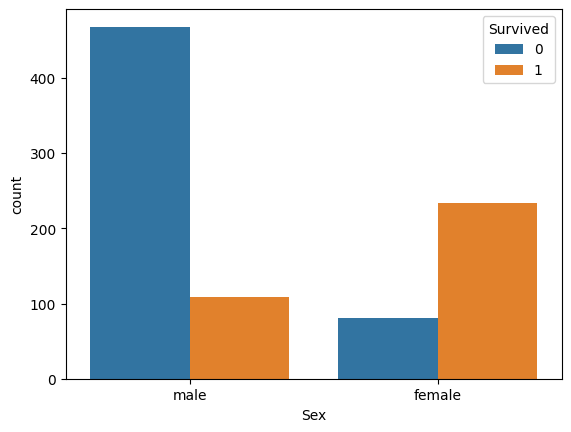

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data = df, x = 'Sex', hue = 'Survived')

É possível perceber que mais mulheres sobreviveram que os homens. Isso pode ter diversos motivos.

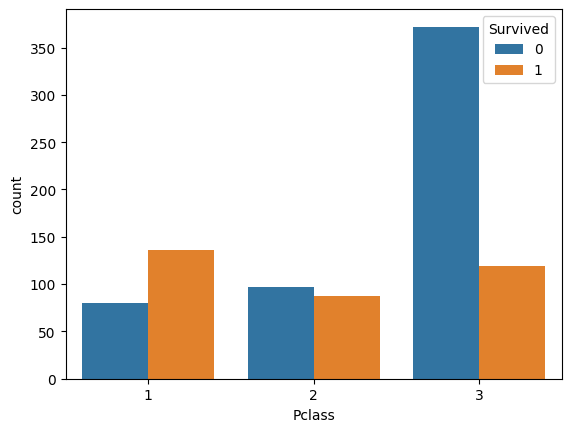

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data = df, x = 'Pclass', hue = 'Survived')

Essa é outra variável categórica que apresenta um comportamento interessante para a variável target.

### Coluna `Name`

A coluna Name possui informações únicas, porém é possível gerar novas features ao se analisar os títulos de cada passageiro. 

In [72]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [85]:
## Pega apenas o título de cada nome
titulo_com_nome = df['Name'].str.split(pat = ', ').str[1]
titulo_sem_nome = titulo_com_nome.str.split().str[0]
df['Title'] = titulo_sem_nome
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilyMembers,titulo,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,Mr.,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,Mrs.,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,Miss.,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,Mrs.,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,Mr.,Mr.


Com a coluna sendo criada, pode-se comparar também a taxa de mortalidade entre os diferentes títulos

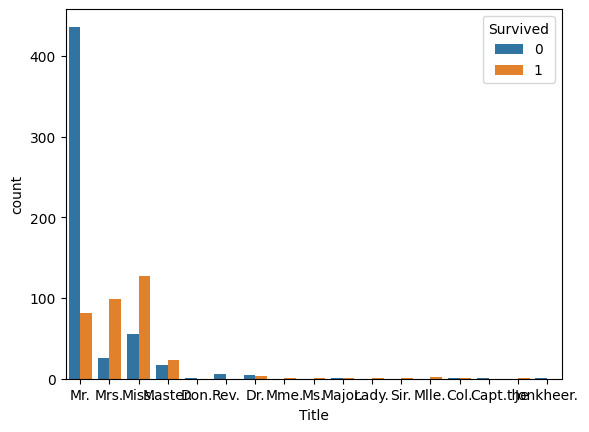

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data = df, x = 'Title', hue = 'Survived')

In [87]:
df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

As tentativas feitas não obtiveram sucesso. Apesar da possibilidade de agrupar, alguns títulos aparecem muito pouco. Além disso, os títulos também possuem ligação com o sexo do passageiro, o que poderia gerar comportamento indesejado do sistema. Por conta disso, essa coluna será removida das análises futuras.

In [88]:
colunas = ['titulo', 'Title', 'Name']

df = df.drop(columns = colunas)

In [89]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyMembers
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


Com essa EDA, o número de variáveis caiu de 9 para 6. Isso é ruim por conta disso e bom por conta daquilo.